# Task 1

### Generate a generic 2D Gaussian-like array (Hint: checkout np.linspace function). Visualize the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
x = np.linspace(-3, 3, num=10000)
f = np.vectorize(norm.pdf)
normal_x = f(x)

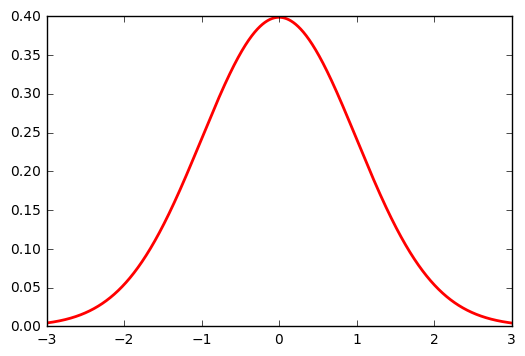

In [4]:
plt.plot(x.reshape(len(x), 1), normal_x.reshape(len(normal_x), 1),  linewidth=2, color='r')
plt.show()

### How to tell if a given 2D array has null columns?

In [5]:
# len(data.shape) > 1 and data.shape[1] > 0

### Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value?

In [6]:
x = np.array([1, 2, 3, 4, 5])
y = x - 1
indexes = np.repeat(y, 3)
np.insert(x, indexes, 0)

array([0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 5])

### Considering a 15x5 matrix, extract rows with unequal values (e.g. [1,2,2,3,4]).

In [ ]:
# sample array
x = np.random.randn(15, 5)

# given array
y = np.array([1, 2, 2, 3, 4])
y = y.reshape(len(y), 1).T
print(y)

# calculate matrix of indicators for equality
y = np.repeat(y, x.shape[0], axis=0)
is_equal = x == y

# print result
acc = np.multiply.reduce(is_equal, axis=1)
res, = np.nonzero(acc)
print("Indexes of rows with elements equal to given:")
print(res)

# test
res_index = 1
for i in range(5):
    is_equal[res_index][i] = True
acc = np.multiply.reduce(is_equal, axis=1)
res, = np.nonzero(acc)
print("Indexes of rows with elements equal to given:")
print(res)

### Given an arbitrary number of vectors, build the cartesian product (every combinations of every item).

In [7]:
x = np.random.randn(2)
y = np.random.randn(3)
z = np.random.randn(2, 3)

# two arrays
np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])

array([[ 2.06159365,  0.35172837],
       [-0.92844417,  0.35172837],
       [ 2.06159365, -0.51381606],
       [-0.92844417, -0.51381606],
       [ 2.06159365, -1.5832321 ],
       [-0.92844417, -1.5832321 ]])

In [9]:
# many arrays
def cartesian(arrays, out=None):
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out
cartesian((x, y, z))

### Consider a random vector with shape (100,2) representing coordinates, find point by point distances. 

In [10]:
z = np.random.randn(6, 2)
print(z)
a = np.tile(z, (z.shape[0], 1))
b = np.repeat(z, z.shape[0], axis=0)

print(np.linalg.norm(a - b, axis=1))

[[ 0.83176324 -0.64256512]
 [-0.77100483  1.48151166]
 [-0.38753064 -1.69466632]
 [-0.71529225  1.21123801]
 [-0.69904209  1.39942063]
 [-1.15035921  0.12268514]]
[ 0.          2.6609336   1.61046406  2.41453241  2.55207186  2.12471583
  2.6609336   0.          3.1992435   0.27595604  0.10916763  1.41078675
  1.61046406  3.1992435   0.          2.92433029  3.10972884  1.97095757
  2.41453241  0.27595604  2.92433029  0.          0.18888295  1.17227582
  2.55207186  0.10916763  3.10972884  0.18888295  0.          1.35415681
  2.12471583  1.41078675  1.97095757  1.17227582  1.35415681  0.        ]
